## Ames Housing Data Linear Regression Model

#### Objective
Create and optimize a Linear Regression Model that predicts the Sale Price of homes in Ames, Iowa

#### Notes
Data colleced between 2006 and 2010

---

## Data Dictionary


- SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
- MSSubClass: The building class
- MSZoning: The general zoning classification
- LotFrontage: Linear feet of street connected to property
- LotArea: Lot size in square feet
- Street: Type of road access
- Alley: Type of alley access
- LotShape: General shape of property
- LandContour: Flatness of the property
- Utilities: Type of utilities available
- LotConfig: Lot configuration
- LandSlope: Slope of property
- Neighborhood: Physical locations within Ames city limits
- Condition1: Proximity to main road or railroad
- Condition2: Proximity to main road or railroad (if a second is present)
- BldgType: Type of dwelling
- HouseStyle: Style of dwelling
- OverallQual: Overall material and finish quality
- OverallCond: Overall condition rating
- YearBuilt: Original construction date
- YearRemodAdd: Remodel date
- RoofStyle: Type of roof
- RoofMatl: Roof material
- Exterior1st: Exterior covering on house
- Exterior2nd: Exterior covering on house (if more than one material)
- MasVnrType: Masonry veneer type
- MasVnrArea: Masonry veneer area in square feet
- ExterQual: Exterior material quality
- ExterCond: Present condition of the material on the exterior
- Foundation: Type of foundation
- BsmtQual: Height of the basement
- BsmtCond: General condition of the basement
- BsmtExposure: Walkout or garden level basement walls
- BsmtFinType1: Quality of basement finished area
- BsmtFinSF1: Type 1 finished square feet
- BsmtFinType2: Quality of second finished area (if present)
- BsmtFinSF2: Type 2 finished square feet
- BsmtUnfSF: Unfinished square feet of basement area
- TotalBsmtSF: Total square feet of basement area
- Heating: Type of heating
- HeatingQC: Heating quality and condition
- CentralAir: Central air conditioning
- Electrical: Electrical system
- 1stFlrSF: First Floor square feet
- 2ndFlrSF: Second floor square feet
- LowQualFinSF: Low quality finished square feet (all floors)
- GrLivArea: Above grade (ground) living area square feet
- BsmtFullBath: Basement full bathrooms
- BsmtHalfBath: Basement half bathrooms
- FullBath: Full bathrooms above grade
- HalfBath: Half baths above grade
- Bedroom: Number of bedrooms above basement level
- Kitchen: Number of kitchens
- KitchenQual: Kitchen quality
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- Functional: Home functionality rating
- Fireplaces: Number of fireplaces
- FireplaceQu: Fireplace quality
- GarageType: Garage location
- GarageYrBlt: Year garage was built
- GarageFinish: Interior finish of the garage
- GarageCars: Size of garage in car capacity
- GarageArea: Size of garage in square feet
- GarageQual: Garage quality
- GarageCond: Garage condition
- PavedDrive: Paved driveway
- WoodDeckSF: Wood deck area in square feet
- OpenPorchSF: Open porch area in square feet
- EnclosedPorch: Enclosed porch area in square feet
- 3SsnPorch: Three season porch area in square feet
- ScreenPorch: Screen porch area in square feet
- PoolArea: Pool area in square feet
- PoolQC: Pool quality
- Fence: Fence quality
- MiscFeature: Miscellaneous feature not covered in other categories
- MiscVal: $Value of miscellaneous feature
- MoSold: Month Sold
- YrSold: Year Sold
- SaleType: Type of sale
- SaleCondition: Condition of sale

## Imports

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Charts
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Modeling
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, ElasticNet, ElasticNetCV, Lasso, LassoCV
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
import sklearn.metrics as metrics

## EDA
Basic sanity checks and early feature investigation. Note, not all EDA that was done is shown, some actions were taken just to increase domain knowledge and then omitted from the final notebook for legibilities sake.

In [2]:
# Load training data into DataFrame named data
data = pd.read_csv('./data/ames_train.csv')
test = pd.read_csv('./data/ames_test.csv')

In [3]:
# Check general size of data set
data.shape

(2051, 81)

In [4]:
# Integrity check
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
Id                 2051 non-null int64
PID                2051 non-null int64
MS SubClass        2051 non-null int64
MS Zoning          2051 non-null object
Lot Frontage       1721 non-null float64
Lot Area           2051 non-null int64
Street             2051 non-null object
Alley              140 non-null object
Lot Shape          2051 non-null object
Land Contour       2051 non-null object
Utilities          2051 non-null object
Lot Config         2051 non-null object
Land Slope         2051 non-null object
Neighborhood       2051 non-null object
Condition 1        2051 non-null object
Condition 2        2051 non-null object
Bldg Type          2051 non-null object
House Style        2051 non-null object
Overall Qual       2051 non-null int64
Overall Cond       2051 non-null int64
Year Built         2051 non-null int64
Year Remod/Add     2051 non-null int64
Roof Style         20

In [5]:
# This is not a lot of missing data
data.isnull().sum().sum()

9822

In [6]:
# General inspection of data
data.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [7]:
# One hot encode selected features
def encode_dataframe(df):
    encode_list = [
        'Foundation',
        'Sale Type'
        #'Roof Style',
        #'Bldg Type',
        #'House Style',
        #'Roof Matl',
        #'Exterior 1st',
        #'Exterior 2nd'
    ]

    return pd.get_dummies(df, drop_first=False, columns=encode_list)

# Call encode function on training data
data = encode_dataframe(data)

In [8]:
# Further integrity check
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,2051.0,1.474034e+03,8.439808e+02,1.0,753.5,1486.0,2.198000e+03,2930.0
PID,2051.0,7.135900e+08,1.886918e+08,526301100.0,528458140.0,535453200.0,9.071801e+08,924152030.0
MS SubClass,2051.0,5.700878e+01,4.282422e+01,20.0,20.0,50.0,7.000000e+01,190.0
Lot Frontage,1721.0,6.905520e+01,2.326065e+01,21.0,58.0,68.0,8.000000e+01,313.0
Lot Area,2051.0,1.006521e+04,6.742489e+03,1300.0,7500.0,9430.0,1.151350e+04,159000.0
Overall Qual,2051.0,6.112140e+00,1.426271e+00,1.0,5.0,6.0,7.000000e+00,10.0
Overall Cond,2051.0,5.562165e+00,1.104497e+00,1.0,5.0,5.0,6.000000e+00,9.0
Year Built,2051.0,1.971709e+03,3.017789e+01,1872.0,1953.5,1974.0,2.001000e+03,2010.0
Year Remod/Add,2051.0,1.984190e+03,2.103625e+01,1950.0,1964.5,1993.0,2.004000e+03,2010.0
Mas Vnr Area,2029.0,9.969591e+01,1.749631e+02,0.0,0.0,0.0,1.610000e+02,1600.0


In [9]:
# Sort categorical correlations to sale price and sort
data.corr()['SalePrice'].sort_values(ascending=False)

SalePrice            1.000000
Overall Qual         0.800207
Gr Liv Area          0.697038
Garage Area          0.650270
Garage Cars          0.648220
Total Bsmt SF        0.628925
1st Flr SF           0.618486
Year Built           0.571849
Year Remod/Add       0.550370
Full Bath            0.537969
Garage Yr Blt        0.533922
Foundation_PConc     0.529047
Mas Vnr Area         0.512230
TotRms AbvGrd        0.504014
Fireplaces           0.471093
BsmtFin SF 1         0.423519
Sale Type_New        0.358102
Lot Frontage         0.341842
Open Porch SF        0.333476
Wood Deck SF         0.326490
Lot Area             0.296566
Bsmt Full Bath       0.283662
Half Bath            0.283001
2nd Flr SF           0.248452
Bsmt Unf SF          0.190210
Bedroom AbvGr        0.137067
Screen Porch         0.134581
3Ssn Porch           0.048732
Sale Type_Con        0.033660
Mo Sold              0.032735
Pool Area            0.023106
Sale Type_ConLI      0.019588
BsmtFin SF 2         0.016255
Sale Type_

#### Charts
Helpful graphs to see patterns/outliers

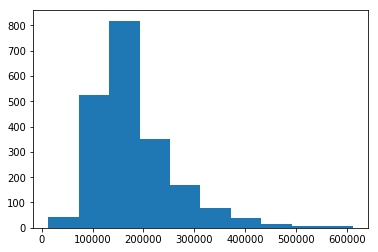

In [10]:
# Check the distribution of target
plt.hist(data['SalePrice']);

In [11]:
# Since target is highly skewed, transforming it may facilitate better modeling
# Maybe try a root transformation
# data['SalePrice'] = np.log(data['SalePrice'])

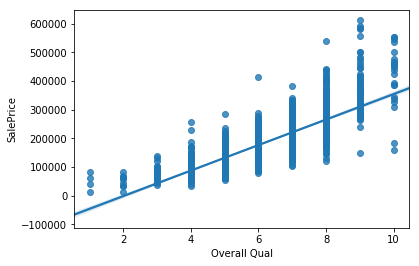

In [12]:
sns.regplot(x=data['Overall Qual'], y=data['SalePrice']);

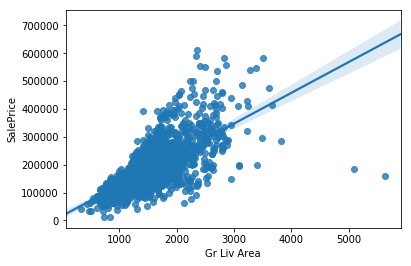

In [13]:
sns.regplot(x=data['Gr Liv Area'], y=data['SalePrice']);

In [14]:
data[data['Gr Liv Area'] > 4000]
# Per results below, will drop outliers by ID 960 and 1885b

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Foundation_Wood,Sale Type_COD,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD
960,1499,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,...,0,0,0,0,0,0,0,1,0,0
1885,2181,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,...,0,0,0,0,0,0,0,1,0,0


In [15]:
data[(data['SalePrice'] < 10) & (data['Gr Liv Area'] < 1000)]
# Also dropping outliers at 183 and 1628

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Foundation_Wood,Sale Type_COD,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD


In [16]:
data.drop([183, 960, 1628, 1885, 1699], inplace=True)

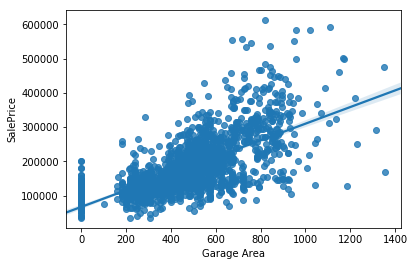

In [17]:
sns.regplot(x=data['Garage Area'], y=data['SalePrice']);

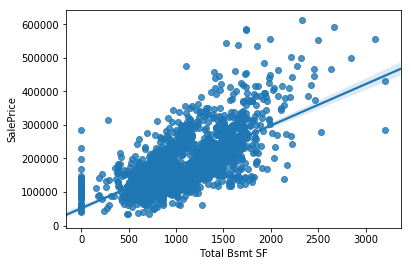

In [18]:
sns.regplot(x=data['Total Bsmt SF'], y=data['SalePrice']);

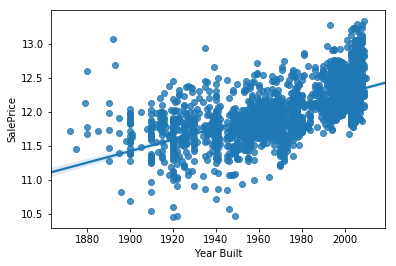

In [19]:
sns.regplot(x=data['Year Built'], y=np.log(data['SalePrice']));

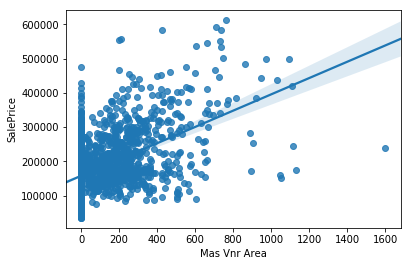

In [20]:
sns.regplot(x=data['Mas Vnr Area'], y=data['SalePrice']);

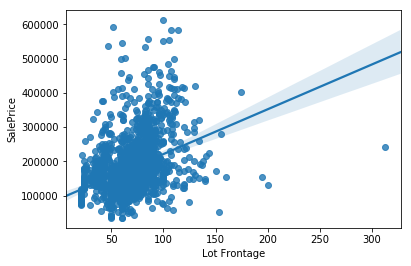

In [21]:
sns.regplot(x=data['Lot Frontage'], y=data['SalePrice']);

## Feature Engineering

#### Total SF
Creating a new feature that is the combination of all square footages, that is, basement, above ground, and garage square footage. It has a high correlation to the target and will be put in the model.

nan

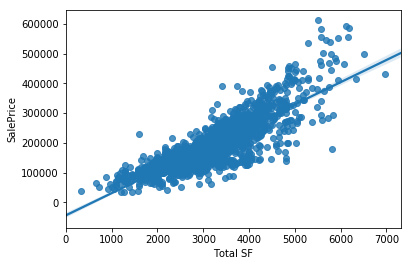

In [23]:
# Function to engineer this feature for a given df
def total_sf(df):   
    df['Total SF'] = df['Total Bsmt SF'] + df['Gr Liv Area'] \
    + df['Garage Area']
    
total_sf(data)
sns.regplot(data['Total SF'], data['SalePrice']);
np.corrcoef(data['Total SF'], data['SalePrice'])[0][1]

#### Outside SF
Check the power of summing outdoor square footage

0.4391775063432711

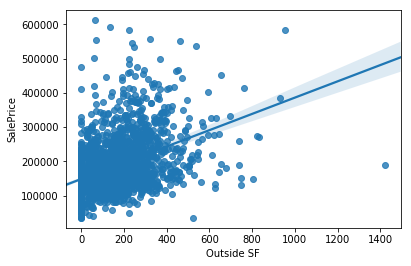

In [24]:
def outside_sf(df):
    df['Outside SF'] = df['Open Porch SF'] + df['Wood Deck SF']
    
outside_sf(data)
sns.regplot(data['Outside SF'], data['SalePrice']);
np.corrcoef(data['Outside SF'], data['SalePrice'])[0][1]

#### Age
Look at the combination of Year Built and Year Add/Remod

0.6220053385708632

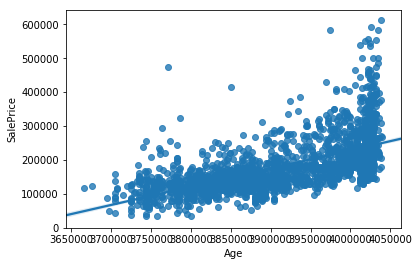

In [25]:
def age_score(df):
    df['Age'] = df['Year Built']*df['Year Remod/Add']
    
age_score(data)
sns.regplot(data['Age'], data['SalePrice']);
np.corrcoef(data['Age'], data['SalePrice'])[0][1]

#### Luxury Count
Combine select luxury indicating features

In [26]:
# Fix a null value in one entry based on other similar entries
data = data.set_value(616, 'Bsmt Half Bath', 0)
data = data.set_value(616, 'Bsmt Full Bath', 0)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  This is separate from the ipykernel package so we can avoid doing imports until


nan

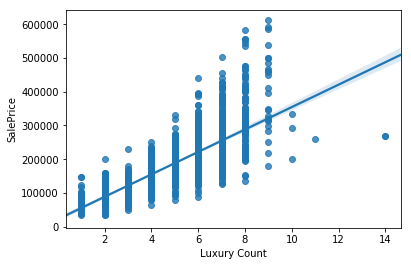

In [27]:
def luxury_sum(df):
    df['Luxury Count'] = df['Fireplaces'] \
    + df['Bsmt Full Bath'] + df['Bsmt Half Bath'] + \
    df['Full Bath'] + df['Half Bath'] + df['Garage Cars']
    
luxury_sum(data)
sns.regplot(data['Luxury Count'], data['SalePrice']);
np.corrcoef(data['Luxury Count'], data['SalePrice'])[0][1]

#### Basement Quality
Turning this into an ordinal feature improved it's correlation with the target by approximately 10%, it should be used.

In [29]:
# Turns the basement quality feature into an ordinal array
def score_basement(row):
    # Feature that will be transformed
    source = 'Bsmt Qual'
    
    if row[source] == 'Ex': # Excellent (100+ inches)
        return 5
    elif row[source] == 'Gd': # Good (90-99 inches)
        return 4
    elif row[source] == 'TA': # Typical (80-89 inches)
        return 3
    elif row[source] == 'Fa': # Fair (70-79 inches)
        return 2
    elif row[source] == 'Po': # Poor (<70 inches)
        return 1
    else: # No Basement
        return 0

0.6114223840734092

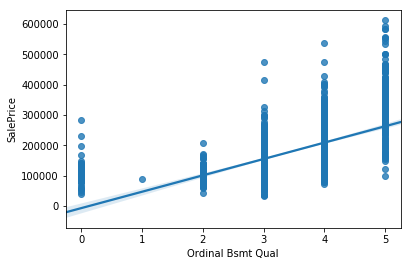

In [30]:
# Functionalize the feature engineering for later call of test df
def ordinal_bsmt_qual(df):
    df['Ordinal Bsmt Qual'] = df.apply(score_basement, axis=1)
    
ordinal_bsmt_qual(data)

sns.regplot(data['Ordinal Bsmt Qual'], data['SalePrice']);
np.corrcoef(data['Ordinal Bsmt Qual'],data['SalePrice'])[0][1]

#### Neighborhood Quality
Bin the neighborhoods by their correlation with SalePrice, good feature, will keep

In [31]:
# Bin neighborhoods by correlation with SalePrice
def score_neighborhoods(row):
    
    source = 'Neighborhood'
    
    excellent = ['NridgHt']
    good = ['CollgCr', 'NoRidge', 'Somerst', 'StoneBr', 'Timber']
    okay = ['ClearCr', 'Crawfor', 'Gilbert', 'Greens', 'GrnHill', 'NWAmes', 'SawyerW', 'Veenker']
    bad = ['Blueste', 'Landmrk', 'Mitchel', 'NPkVill', 'SWISU']
    
    if row[source] in excellent:
        return 4
    if row[source] in good:
        return 3
    elif row[source] in okay:
        return 2
    elif row[source] in bad:
        return 1
    else:
        return 0

0.6768233934162604

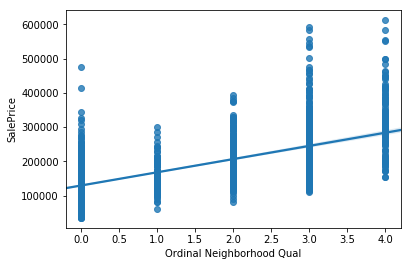

In [32]:
# Turn neighborhoods into ordinal array
def ordinal_neighborhood_qual(df):    
    df['Ordinal Neighborhood Qual'] = df.apply(score_neighborhoods, axis=1)
    
ordinal_neighborhood_qual(data)

sns.regplot(data['Ordinal Neighborhood Qual'], data['SalePrice']);
np.corrcoef(data['Ordinal Neighborhood Qual'], data['SalePrice'])[0][1]

#### Exterior Quality
Capture value of exterior quality, bin, and check correlation to price

In [34]:
def score_exterior_qual(row):
    
    source = 'Exter Qual'
    
    if row[source] == 'Ex': # Excellent
        return 4
    elif row[source] == 'Gd': # Good
        return 3
    elif row[source] == 'TA': # Average/Typical
        return 2
    elif row[source] == 'Fa': # Fair
        return 1
    else: # Poor
        return 0

0.7143536604430512

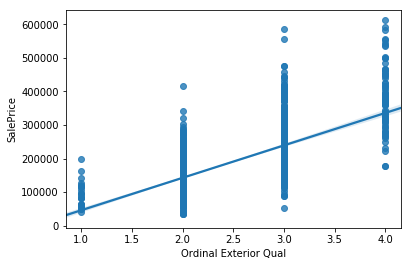

In [35]:
def ordinal_exterior_qual(df):   
    df['Ordinal Exterior Qual'] = df.apply(score_exterior_qual, axis=1)
    
ordinal_exterior_qual(data)

sns.regplot(data['Ordinal Exterior Qual'], data['SalePrice']);
np.corrcoef(data['Ordinal Exterior Qual'], data['SalePrice'])[0][1]

In [36]:
# Bin styles and materials with dict of their correlation to price
def score_styles(row):
    
    styles_dict = {
        'HouseStyle' : {
            '1.5Fin': -0.19568204535543707,
            '1.5Unf': -0.06713383194105647,
            '1Story': -0.020765133505871145,
            '2.5Fin': 0.04317059813780296,
            '2.5Unf': 0.01125858864563097,
            '2Story': 0.20216237328770031,
            'SFoyer': -0.06404586858798751,
            'SLvl': -0.04132323931979004
        },
        'RoofStyle': {
            'Flat': 0.010268929725445256,
            'Gable': -0.2514676382921077,
            'Gambrel': -0.04196560656920938,
            'Hip': 0.26750389170540667,
            'Mansard': -0.021246406846898963,
            'Shed': 0.013431549065890456
        },
        'RoofMatl': {
            'CompShg': -0.07285630757996234,
            'Membran': 0.016992654873356872,
            'Tar&Grv': 0.007459424093174841,
            'WdShake': 0.04682720116569266,
            'WdShngl': 0.09971353154839525,
            'Metal': 0.0, # Added manually
            'Roll': 0.0 # Added manually
        },
        'Exterior1st': {
            'AsbShng': -0.12630933038607453,
            'AsphShn': -0.027797151531158554,
            'BrkComm': -0.024452025707541503,
            'BrkFace': 0.027281128597469274,
            'CBlock': -0.034990787735149756,
            'CemntBd': 0.16794055767356478,
            'HdBoard': -0.11380169807999747,
            'ImStucc': 0.022762904873624375,
            'MetalSd': -0.1480807076941425,
            'Plywood': -0.038307633401335875,
            'Stone': 0.03080599425034965,
            'Stucco': -0.06094172468616997,
            'VinylSd': 0.34081608210638753,
            'Wd Sdng': -0.19251682864323647,
            'WdShing': -0.05477297318849323,
            'PreCast': 0.0 # Added manually
        }
    }
    
    score_house_style = styles_dict['HouseStyle'][row['House Style']]
    score_roof_style = styles_dict['RoofStyle'][row['Roof Style']]
    score_roof_matl = styles_dict['RoofMatl'][row['Roof Matl']]
    score_exterior1 = styles_dict['Exterior1st'][row['Exterior 1st']]
    
    score = score_house_style + score_roof_style + score_roof_matl + score_exterior1
    
    if score >= 0.6:
        return 7
    elif score >= 0.4 and score < 0.6:
        return 6
    elif score >= 0.2 and score < 0.4:
        return 5
    elif score >= 0.2 and score < 0.4:
        return 6
    
    elif score >= 0.0 and score < 0.2:
        return 4
    elif score < 0.0 and score > -0.2:
        return 3
    
    elif score <= -0.2 and score > -0.4:
        return 2
    elif score <= -0.4 and score > -0.6:
        return 1
    elif score <= -0.4 and score > -0.6:
        return 1
    else:
        return 0

0.5050608292370385

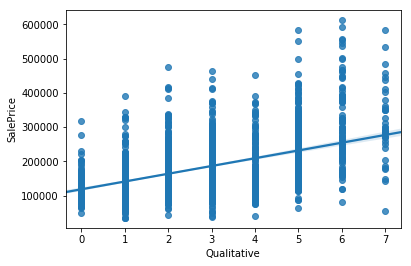

In [37]:
def qualitative_scoring(df):
    df['Qualitative'] = df.apply(score_styles, axis=1)
    
qualitative_scoring(data)

sns.regplot(data['Qualitative'], data['SalePrice']);
np.corrcoef(data['Qualitative'], data['SalePrice'])[0][1]

#### Utilities
Feature to capture the value of respective utilities

In [38]:
def score_utilities(row):  
    utilities_dict = {
        'HeatingQC': {
            'Ex': 0.45297886270094606,
            'TA': -0.34333562552430424,
            'Gd': -0.1151493460646094,
            'Fa': -0.14917392568000912,
            'Po': -0.05430306691397665
        },
        'CentralAir': {
            'Y': 0.2773186063067728,
            'N': -0.27731860630677274
        }
    }
    
    score_heating_qc = utilities_dict['HeatingQC'][row['Heating QC']]
    score_central_air = utilities_dict['CentralAir'][row['Central Air']]
    
    score = score_heating_qc + score_central_air
    
    if score >= 0.6:
        return 7
    elif score >= 0.4 and score < 0.6:
        return 6
    elif score >= 0.2 and score < 0.4:
        return 5
    elif score >= 0.2 and score < 0.4:
        return 6
    
    elif score >= 0.0 and score < 0.2:
        return 4
    elif score < 0.0 and score > -0.2:
        return 3
    
    elif score <= -0.2 and score > -0.4:
        return 2
    elif score <= -0.4 and score > -0.6:
        return 1
    elif score <= -0.4 and score > -0.6:
        return 1
    else:
        return 0
    

0.4878995514306871

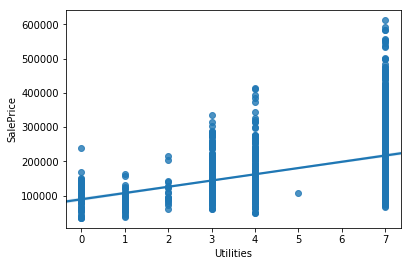

In [39]:
def utilities(df):
    df['Utilities'] = df.apply(score_utilities, axis=1)
    
utilities(data)

sns.regplot(data['Utilities'], data['SalePrice']);
np.corrcoef(data['Utilities'], data['SalePrice'])[0][1]

#### Feature Transform
Master function to keep features for transforming collected, so they can be called later to transform the unseen test data

In [40]:
# Use this on test df to ensure same features are transformed
def transform_features(df):
    total_sf(df)
    ordinal_bsmt_qual(df)
    ordinal_neighborhood_qual(df)
    ordinal_exterior_qual(df)
    luxury_sum(df)
    outside_sf(df)
    qualitative_scoring(df)
    age_score(df)
    utilities(df)

#### <font color=grey> Feature Selection Function
<font color=grey>Messing around mostly, could be useful for fast, dirty, simple models without regulatization.

In [41]:
# Make this work with dfs, have it output lr scores so it can be plotter
# over different corr and coln thresholds
def select_features(df, target, corr_thresh, coln_thresh):
    
    # Create a new df of features against SalePrice
    corr_df = data.corr()[[target]]
    # Update the df for only features above the correlation threshold
    corr_df = corr_df[corr_df[target] >= corr_thresh]
    
    # Create a coln df that only considers features that passed above test
    coln_df = df[corr_df.index]
    # Create a list of features to conditionally remove
    features = list(coln_df.columns[:])
    
    # Loop through each feature to compare vs other features
    for i in coln_df.columns:
        # Loop through each feature
        for j in coln_df.columns:
            # If reflexive or vs target, move on
            if i == j or j == target:
                pass
            # Check if colinearity between i and j features is over threshold
            elif np.corrcoef(coln_df[i], coln_df[j])[0][1] >= coln_thresh:
                # Set the i or j feature with lower correlation to target to drop
                if np.corrcoef(coln_df[i], coln_df[target])[0][1] \
                > np.corrcoef(coln_df[j], coln_df[target])[0][1]:
                    #features.drop(labels=j, axis=1, inplace=True)
                    try:
                        features.remove(j)
                    except:
                        pass
    
    # Remove the target from the feature list
    features.remove(target)
    
    return features

In [42]:
# Select features from df given, against target given, by thresholds specified
# proposed_features = select_features(df=data, 
#                            target='SalePrice', 
#                            corr_thresh=0.4, 
#                            coln_thresh=0.7)

# proposed_features

#### Select Features
Manually selecting features to optimize model accuracy

In [43]:
# List of features to try, organized by general domain
features = [
    # Continuous Quality
    'Overall Qual',
    
    # Continuous Value
    'Mas Vnr Area',
#     'Lot Frontage',
#     'Lot Area',
    
    # Square Footage Features
    'Total SF', # Engineered
#     'Gr Liv Area',
#     'Total Bsmt SF',
#     '1st Flr SF',
#     'Outside SF', #Engineered
    
    # Age Features
    'Age', # Engineered
#     'Year Built',
#     'Year Remod/Add',
    'Garage Yr Blt',
    
    # Ordinal Qualities
    'Ordinal Exterior Qual', # Engineered
    'Ordinal Neighborhood Qual', # Engineered
#     'Ordinal Bsmt Qual', # Engineered
#     'Foundation_PConc',
    
    # Luxury Features
    'Luxury Count', # Engineered
    'Utilities', # Engineered
#     'Garage Cars',
#     'Full Bath',
#     'Half Bath',
#     'Fireplaces',
    
    
    #Qualitative Features
    'Qualitative'
]

Treat features by dropping NA values to prevent issues in modeling

In [44]:
# Dropping null values in all features used
data.dropna(subset=features, inplace=True)

## Modeling

#### Feature and Target assignment

In [45]:
X = data[features]
y = data['SalePrice']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y)

#### Model instantiation, fitting, and scoring

In [65]:
# Create modeling pipeline with polynomial, scaling, and linear regression
pipe = Pipeline([
    ('poly', PolynomialFeatures(include_bias=False)),
    ('ss', StandardScaler()),
#     ('lassm', LassoCV())
    ('lr', LinearRegression())
])

# Fit the pipeline and supress output with ;
pipe.fit(X_train, y_train);

# Print relevant scores
print('training score:',pipe.score(X_train, y_train))
print('test score:', pipe.score(X_test, y_test))

training score: 0.9089473651455047
test score: 0.8913995994171395


Commented out the GridSearch below, as the overfit model with any regularization performed worse than conservative linear regression,

In [63]:
# params = {
#     'lassm__alphas': [np.linspace(500.0, 1000, 1000)]
# }

# gs = GridSearchCV(pipe, param_grid=params)
# gs.fit(X_train, y_train)
# print(gs.best_score_)
# #print(gs.best_params_)
# gs.score(X_test, y_test)

## Output for Assignment Submission
Put the test.csv data through the same transformations as the training data.

Output needs to be tuples of id then predicted value

In [56]:
# Import test csv and assing it to test DataFrame
test = pd.read_csv('./data/ames_test.csv')

In [57]:
# Create submission DataFrame and assign the Ids from test to it
submission = pd.DataFrame()
submission['Id'] = test.Id

In [58]:
# Call one hot encoding on test data
test = encode_dataframe(test)

# Put test data through all feature engineering transforms
transform_features(test)

# Put X in terms of numeric only to avoid null issues
X_final = test[features].select_dtypes(include=[np.number]).interpolate()

In [59]:
# Assign predictions to submission DataFrame
submission['SalePrice'] = pipe.predict(X_final)

In [60]:
# Quick sanity check of submission DataFrame
submission.head()

,Id,SalePrice
0,2658,143702.519468
1,2718,172511.195844
2,2414,189758.164933
3,1989,125884.795380
4,625,177818.074718


In [53]:
# Output a csv for submitting to Kaggle
submission.to_csv('submission16.csv', index=False)